# StayWise Airbnb Price Prediction

Predict optimal nightly prices for Airbnb listings using machine learning.  
This notebook covers:

1. Data Loading
2. Missing Value Handling
3. Feature Engineering
4. Outlier Handling
5. Preprocessing Pipeline
6. Model Training & Evaluation
7. MLflow Experiment Tracking
8. Key Insights


  StayWise — Airbnb Price Prediction  
### MLflow  AWS S3 | End-to-End Machine Learning Pipeline

This notebook walks through the complete workflow for predicting Airbnb listing prices using:

- **AWS S3** for dataset storage  
- **Pandas** for preprocessing  
- **Scikit-learn** for modeling  
- **MLflow** for experiment tracking + model registry  

### **Objectives**
1. Retrieve Airbnb dataset from AWS S3  
2. Perform data cleaning & preprocessing  
3. Engineer new features  
4. Handle missing values & outliers  
5. Train multiple regression models  
6. Track all experiments using MLflow
7. Register the best model  


##  Load Dataset from AWS S3

The dataset is stored in S3.  
Make sure the following environment variables are set:
I am using BOTO3


In [2]:
pip install boto3

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\aman2\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Checking my Bucket

In [4]:
import boto3

s3 = boto3.client("s3")
response = s3.list_buckets()
print([b['Name'] for b in response['Buckets']])


['airbnb']


##  Load Dataset from AWS S3

The dataset is stored in S3.  
Make sure the following environment variables are set:

We need this info to connect to the S3:

AWS_ACCESS_KEY_ID
AWS_SECRET_ACCESS_KEY
AWS_DEFAULT_REGION
S3_BUCKET
S3_KEY



## We will now load the dataset directly into Pandas.


In [36]:
import boto3
import pandas as pd


s3 = boto3.client("s3")

bucket_name = "airbnb"          
file_key = "AB_NYC_2019.csv" 

# Get the CSV object
obj = s3.get_object(Bucket=bucket_name, Key=file_key)

# Read into pandas DataFrame
df = pd.read_csv(obj['Body'])
df.head(1000)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,402037,Stay with a Jazz Singer in Harlem!,2006712,Amanda,Manhattan,Harlem,40.80192,-73.95827,Private room,125,1,0,NaN,NaN,1,365
996,403056,Large Private Room Near Central Park & Mount S...,2010724,K. Naomi,Manhattan,East Harlem,40.79314,-73.94853,Private room,125,3,74,2019-05-28,0.84,3,212
997,403264,Luxury room in Manhattan Duplex Apt,1386983,Candice,Manhattan,Midtown,40.74530,-73.99056,Private room,145,3,165,2019-07-03,1.88,2,181
998,403668,"Gorgeous Sunny, Spacious 1 bdrm in East Village",2013117,Katya,Manhattan,East Village,40.72812,-73.97966,Entire home/apt,147,2,16,2019-01-02,0.18,1,0


#  1. Exploratory Data Analysis (EDA) on Original Dataset

Before cleaning and feature engineering, it is important to understand the raw data:

1. Price distribution  
2. Room type distribution  
3. Neighbourhood group distribution  
4. Number of reviews distribution  
5. Minimum nights distribution  
6. Last review distribution (missing values)  
7. Reviews per month distribution (missing values)  
8. Price vs room type  
9. Price vs neighbourhood group  
10. Correlation heatmap of numerical features  
11. Price vs host_name presence (missing)  
12. Price vs name presence (missing)


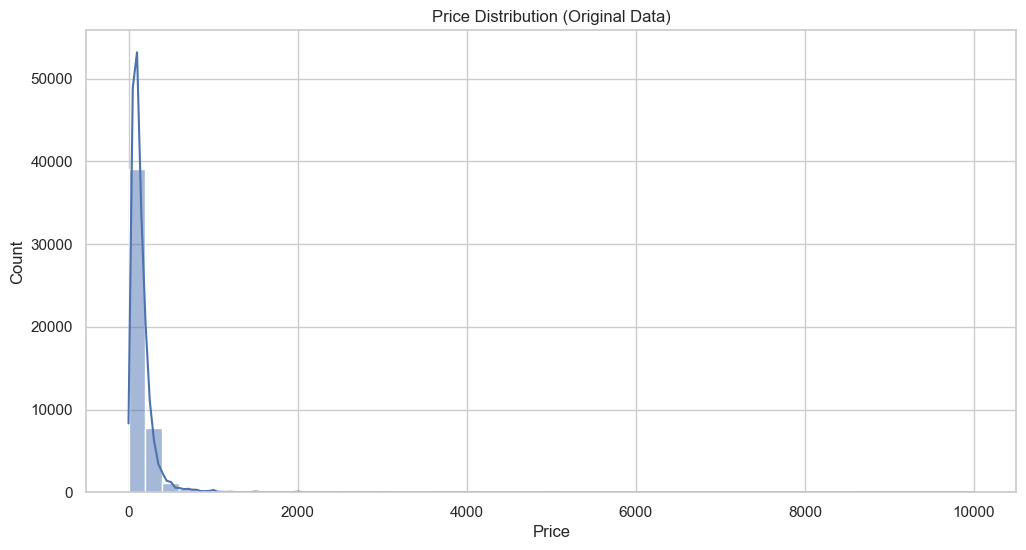

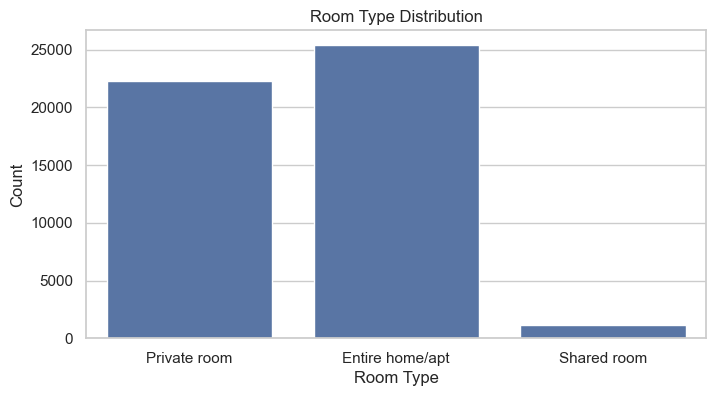

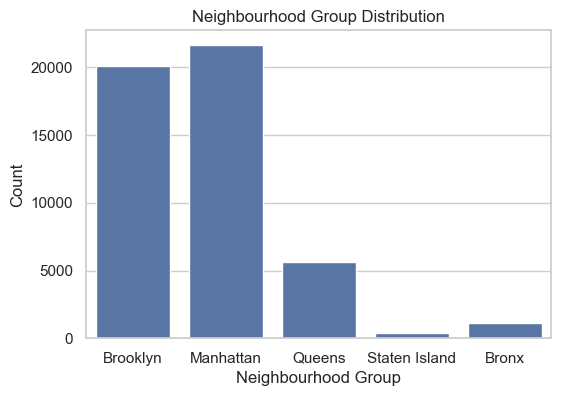

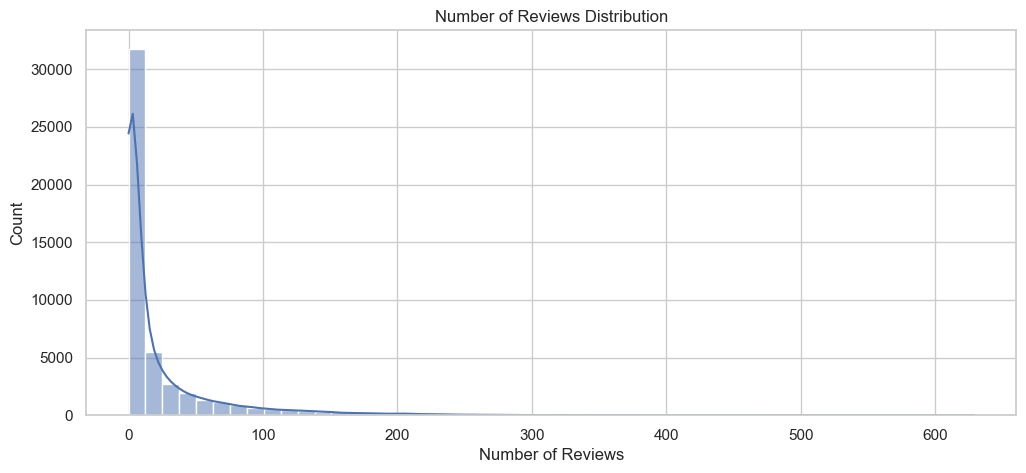

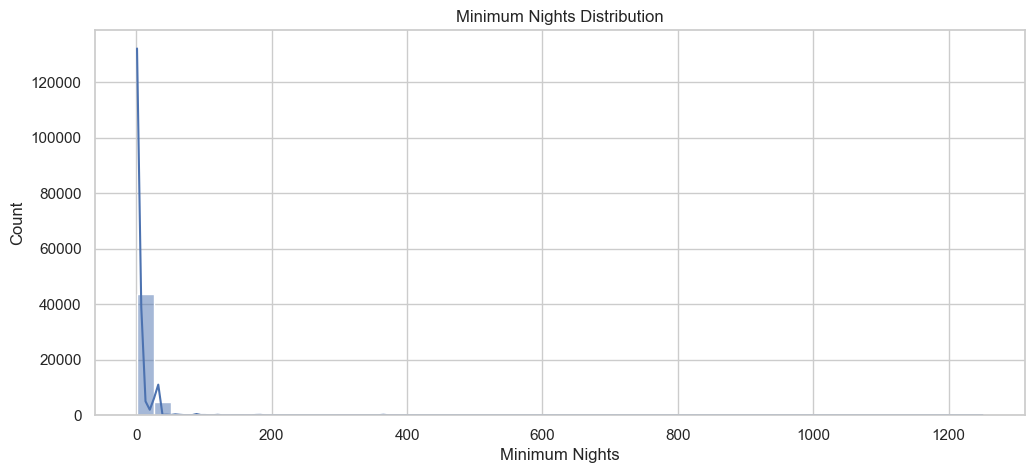

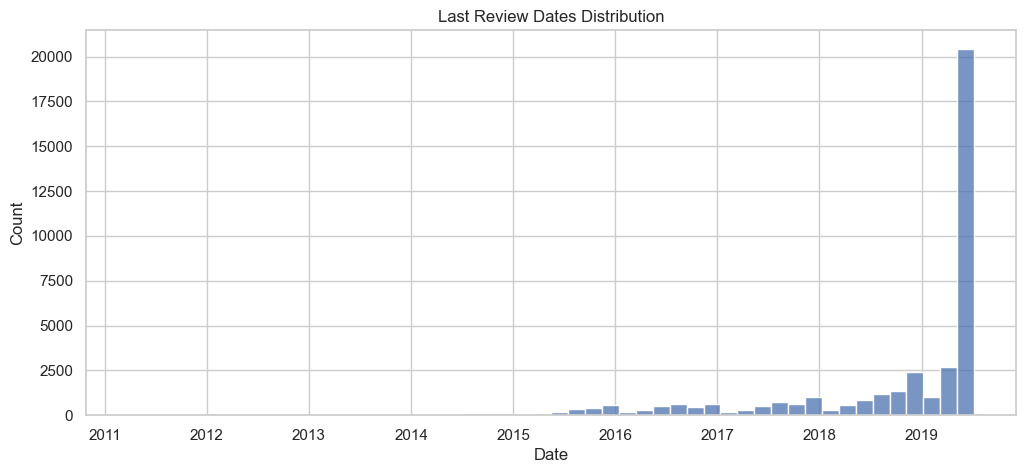

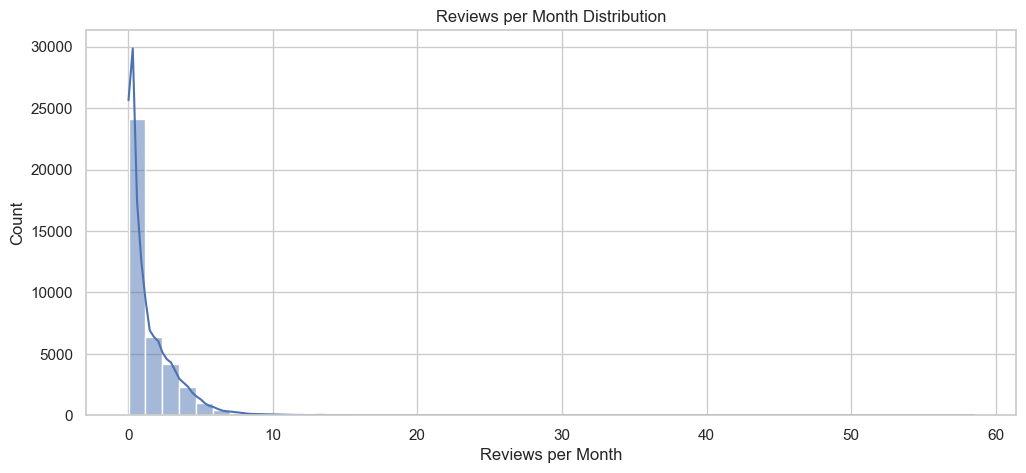

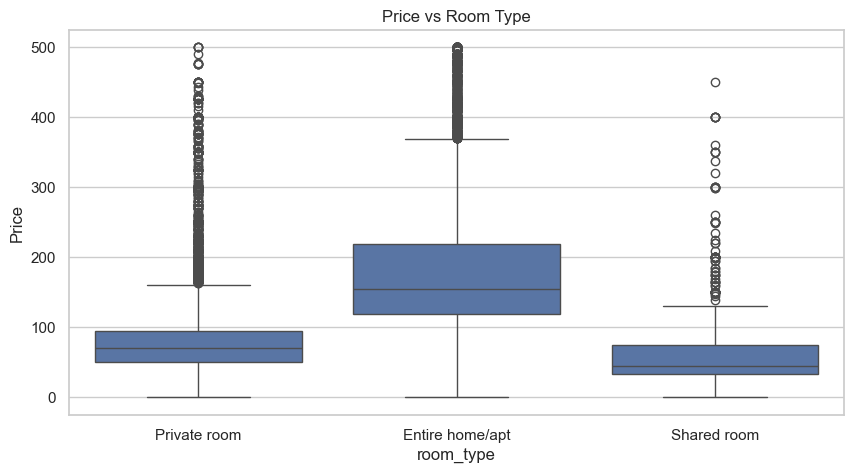

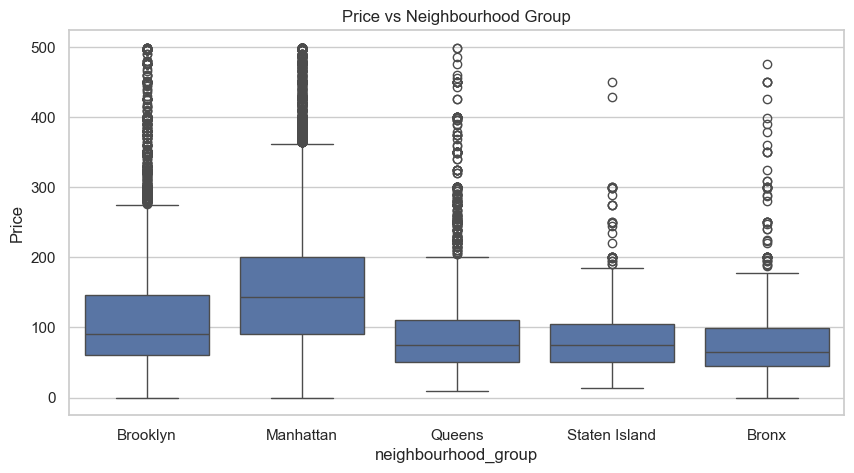

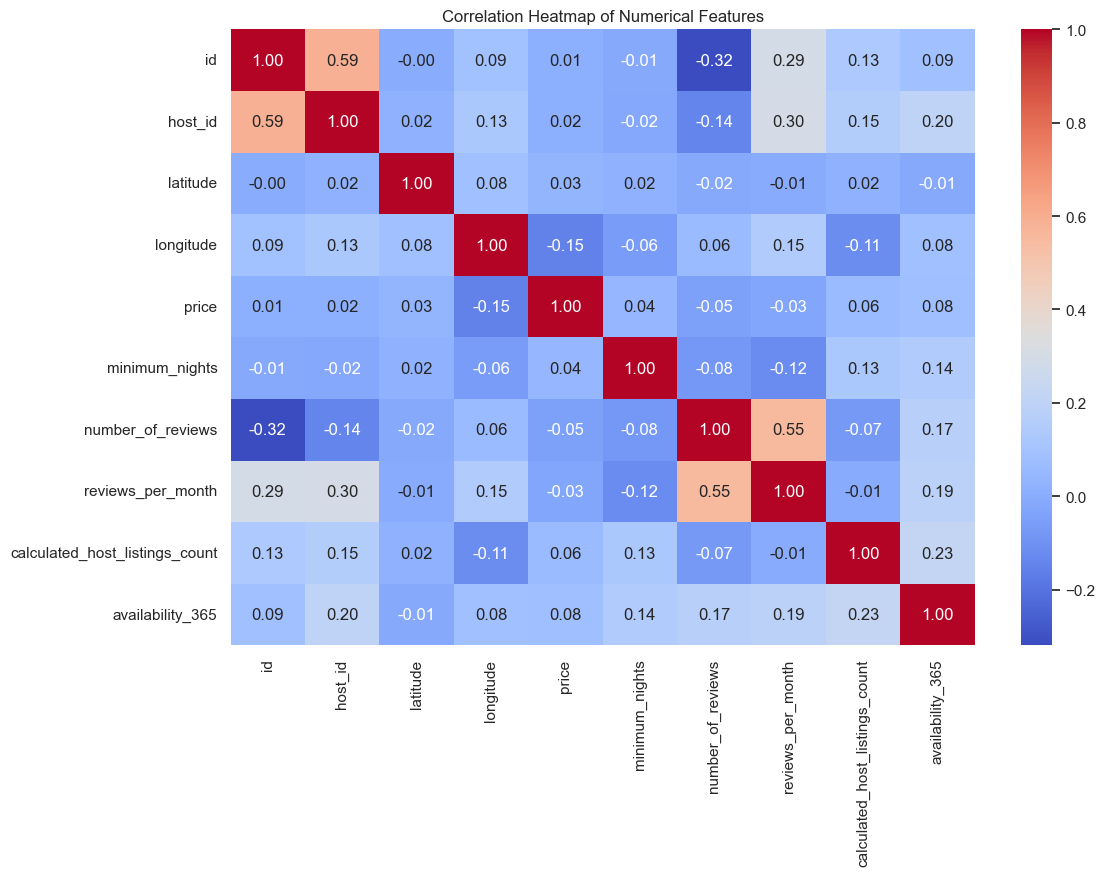

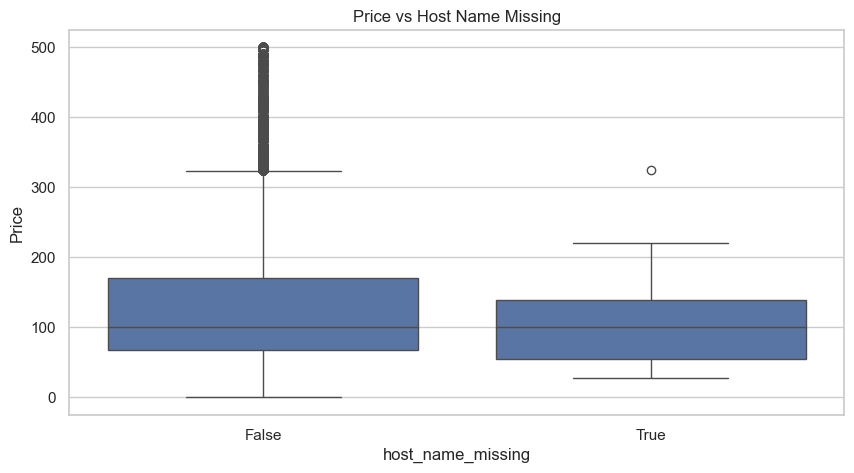

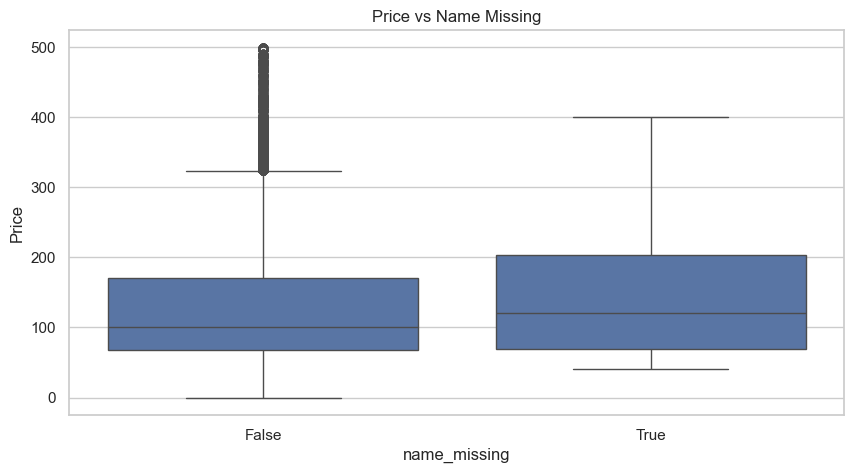

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
#          Price Distribution
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution (Original Data)')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8,4))
#          Room Type Distribution
sns.countplot(x='room_type', data=df)
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6,4))
#          Neighbourhood Group Distribution
sns.countplot(x='neighbourhood_group', data=df)
plt.title('Neighbourhood Group Distribution')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12,5))
#          Number of Reviews Distribution
sns.histplot(df['number_of_reviews'], bins=50, kde=True)
plt.title('Number of Reviews Distribution')
plt.xlabel('Number of Reviews')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12,5))
#         Minimum Nights Distribution
sns.histplot(df['minimum_nights'], bins=50, kde=True)
plt.title('Minimum Nights Distribution')
plt.xlabel('Minimum Nights')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12,5))
#        Last Review Distribution (missing values)
sns.histplot(pd.to_datetime(df['last_review'], errors='coerce').dropna(), bins=50)
plt.title('Last Review Dates Distribution')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12,5))
#       Reviews per Month Distribution (missing values)
sns.histplot(df['reviews_per_month'].dropna(), bins=50, kde=True)
plt.title('Reviews per Month Distribution')
plt.xlabel('Reviews per Month')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10,5))
#        Price vs Room Type
sns.boxplot(x='room_type', y='price', data=df[df['price']<500])
plt.title('Price vs Room Type')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10,5))
#      Price vs Neighbourhood Group
sns.boxplot(x='neighbourhood_group', y='price', data=df[df['price']<500])
plt.title('Price vs Neighbourhood Group')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(12,8))
#        Correlation Heatmap of Numerical Features
num_features = df.select_dtypes(include=['int64','float64']).columns
corr = df[num_features].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

plt.figure(figsize=(10,5))
#      Price vs Host Name Presence (missing)
df['host_name_missing'] = df['host_name'].isna()
sns.boxplot(x='host_name_missing', y='price', data=df[df['price']<500])
plt.title('Price vs Host Name Missing')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10,5))
#       Price vs Name Presence (missing)
df['name_missing'] = df['name'].isna()
sns.boxplot(x='name_missing', y='price', data=df[df['price']<500])
plt.title('Price vs Name Missing')
plt.ylabel('Price')
plt.show()


## Exploratory Data Analysis (EDA) Part 2nd

We inspect:

- Data shape  
- Missing values  
- Data types  
- Summary statistics  
- Distribution of target variable `price`  


In [8]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [10]:
df.shape

(48895, 16)

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [12]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [13]:
df['price'].describe()


count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

## 2. Data Cleaning & Preprocessing

In this section, we handle missing values, convert data types, engineer new features, and prepare the dataset for modeling.  
The missing-value summary shows the following columns with missing data:

name:16 missing
host_name:21 missing
last_review:10,052 missing
reviews_per_month:10,052 missing

### Strategy for Handling Missing Data
## For Price:
Steps:
- Remove rows with no price  
- Clean price column (remove and commas)  
- Convert types if necessar4

1. **Drop low-impact text columns with very few missing values**
   name and host_name contain only a few missing entries.  
    These will be filled with Unknown.

2. **Handle date and numerical missing values**
    last_review is a date field → convert to datetime and fill missing with No Review.
    reviews_per_month` replace missing values with **0**, meaning “no reviews yet”.

3. **Outlier Handling**
   Remove listings where price == 0
   Remove listings with extremely high prices using the IQR rule.

4. **Feature Engineering**
   Convert last_review to:
   days_since_last_review
   Encode categorical columns:
   neighbourhood_group
   neighbourhood
   room_type

5. **Final Step**
   Create the cleaned dataset for modeling.


In [14]:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df = df.dropna(subset=['price'])
df.head()


<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\aman2\AppData\Local\Temp\ipykernel_21516\713817531.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0


# Data Cleaning

We handle missing values and prepare the dataset for feature engineering:

1. **Missing name and host_name**  
   - Filled with "Unknown" to retain all rows.

2. **Missing last_review**  
   - Converted to datetime.  


3. **Missing reviews_per_month**  
   - Filled with `0` as missing implies no reviews.

After cleaning, there are **no missing values** in the dataset.


In [37]:
import pandas as pd
import numpy as np

df_clean = df.copy()


df_clean['name'] = df_clean['name'].fillna("Unknown")
df_clean['host_name'] = df_clean['host_name'].fillna("Unknown")
df_clean['last_review'] = pd.to_datetime(df_clean['last_review'], errors='coerce')


df_clean['last_review'] = df_clean['last_review'].fillna(pd.Timestamp("2000-01-01"))
df_clean['reviews_per_month'] = df_clean['reviews_per_month'].fillna(0)

df_clean.isna().sum()


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

###  Outlier Detection & Removal

Airbnb price data often contains very high prices that can distort model training.  
We use the **IQR (Interquartile Range) method** to remove extreme values.

Steps:
1. Calculate Q1 and Q3 of the price column.
2. Compute IQR = Q3 - Q1.
3. Remove rows outside the acceptable range:
   - Lower bound = Q1 - 1.5 × IQR  
   - Upper bound = Q3 + 1.5 × IQR

We also remove listings where price == 0 because it is unrealistic.


In [38]:

df_clean = df_clean[df_clean['price'] > 0]

# IQR method
Q1 = df_clean['price'].quantile(0.25)
Q3 = df_clean['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df_clean[(df_clean['price'] >= lower_bound) & (df_clean['price'] <= upper_bound)]

df_clean.shape


(45912, 16)

# 3. Feature Engineering for Airbnb Price Prediction

Feature engineering is the process of transforming raw data into meaningful features that improve machine learning model performance. 

For this Airbnb dataset, we perform the following feature engineering steps:

1. **Days Since Last Review**: Converts last_review dates into numerical values representing how long ago the last review occurred.
2. **Review Density**: Combines number_of_reviews and reviews_per_month to indicate review activity.
3. **Capped Minimum Nights**: Caps extreme values in minimum_nights to prevent skewing the model.
4. **Host Type**: Categorizes hosts based on how many listings they have (e.g., Superhost vs Small Host).
5. **Seasonal Features**: Extracts month and year from the last review to capture seasonal effects.
6. **Interaction Features**: Combines features like neighborhood and room type to capture complex relationships.
7. **Drop unnecessary columns**: Uses latitude and longitude to cluster properties by location (not implemented in this basic version).
8. **Identify categorical and numerical columns**: consider only necesarry features.

In [48]:

df_feat = df_clean.copy()
today = pd.Timestamp("2025-01-01")
df_feat['days_since_last_review'] = (today - df_feat['last_review']).dt.days
df_feat['review_density'] = df_feat['number_of_reviews'] / (df_feat['reviews_per_month'] + 1e-6)

# Cap min nights
df_feat['min_nights_capped'] = df_feat['minimum_nights'].apply(lambda x: min(x, 30))
# Host type
df_feat['host_type'] = df_feat['calculated_host_listings_count'].apply(lambda x: 'Superhost' if x>5 else 'Small Host')
# Seasonal features
df_feat['last_review_month'] = df_feat['last_review'].dt.month
df_feat['last_review_year'] = df_feat['last_review'].dt.year
# Interaction feature
df_feat['neighbourhood_room'] = df_feat['neighbourhood'] + "_" + df_feat['room_type']
# Drop unnecessary columns
df_feat = df_feat.drop(columns=['id', 'name', 'host_id', 'host_name', 'last_review'])
categorical_cols = ['neighbourhood_group', 'neighbourhood', 'room_type', 'host_type', 'neighbourhood_room']
numerical_cols = [col for col in df_feat.select_dtypes(include=['int64','float64']).columns if col != 'price']

df_feat.head()


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,days_since_last_review,review_density,min_nights_capped,host_type,last_review_month,last_review_year,neighbourhood_room
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,2266,42.856939,1,Superhost,10,2018,Kensington_Private room
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,2052,118.420741,1,Small Host,5,2019,Midtown_Entire home/apt
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,9132,0.000000,3,Small Host,1,2000,Harlem_Private room
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,2007,58.189643,1,Small Host,7,2019,Clinton Hill_Entire home/apt
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,2235,89.999100,10,Small Host,11,2018,East Harlem_Entire home/apt


# 4. Train-Test Split

To evaluate our machine learning models properly, we split the dataset into **training** and **testing** sets:

- **Training set (80%)**: Used to train the models.
- **Testing set (20%)**: Used to evaluate the model's performance on unseen data.




This split ensures that our model is evaluated fairly and prevents data leakage.


In [47]:
from sklearn.model_selection import train_test_split


X = df_feat.drop(['price'], axis=1)  # all columns except target
y = df_feat['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (36729, 17)
X_test shape: (9183, 17)
y_train shape: (36729,)
y_test shape: (9183,)


# 5.Model Training and Experiment Tracking with MLflow

We train three regression models to predict Airbnb listing prices:

1. **Linear Regression** – Simple baseline model.  
2. **Random Forest Regressor** – Captures non-linear relationships and interactions.  
3. **Gradient Boosting Regressor** – Ensemble method that iteratively improves predictions.  




In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import mlflow
import mlflow.sklearn
import numpy as np

# Models I will Use

We train three regression models using the features and target variable:

1. **Linear Regression** – Simple baseline.  
2. **Random Forest** – Captures non-linear patterns in the data.  
3. **Gradient Boosting** – Sequential boosting to improve prediction accuracy.  

We evaluate using **RMSE** and **R²** and track experiments using **MLflow**.


In [24]:
models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(n_estimators=50, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=50, random_state=42)
}


# Model Training with Preprocessing Pipeline

We build a full **machine learning pipeline** including:

1. **Preprocessing**  
   - Numeric features are scaled using StandardScaler.  
   - Categorical features are one-hot encoded (OneHotEncoder).  

2. **Model Training**  
   - Linear Regression, Random Forest, and Gradient Boosting are trained using a Pipeline that includes preprocessing.  

3. **Experiment Tracking**  
   - All runs are logged with **MLflow**:
     
     - Trained model pipelines  
   - This ensures reproducibility and easy model comparison.

The results of each model are summarized below.


2025/11/20 18:56:07 INFO mlflow.tracking.fluent: Experiment with name 'StayWise_Airbnb_new' does not exist. Creating a new experiment.
2025/11/20 18:56:11 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/20 18:56:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/11/20 19:09:04 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/20 19:09:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/11/20 19:09:37 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/20 19:09:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging t

Model Performance Summary:
LinearRegression: RMSE=45.5635, R2=0.5415
RandomForest: RMSE=44.0828, R2=0.5708
GradientBoosting: RMSE=45.3068, R2=0.5467


# Data Preprocessing

We use **separate pipelines** for numeric and categorical features to clean and scale the data:

1. **Numeric Features**  
   - Missing values are imputed with the **median**.  
   - Features are scaled using **StandardScaler**.

2. **Categorical Features**  
   - Missing values are filled with "missing".  
   - Features are **one-hot encoded**.  

3. **ColumnTransformer**  
   - Combines numeric and categorical pipelines.  
   - Ensures the preprocessing steps are applied consistently during training and testing.
    

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical pipeline
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_cols),
    ('cat', cat_pipeline, categorical_cols)
])

# Model Training and MLflow Tracking

We train three regression models using a **full preprocessing pipeline**:

1. **Linear Regression** – Baseline linear model.  
2. **Random Forest Regressor** – Captures non-linear relationships.  
3. **Gradient Boosting Regressor** – Sequential boosting for better accuracy.  

**Steps:**

- Combine numeric and categorical preprocessing in a Pipeline.  
- Fit the pipeline on the **training set**.  
- Evaluate performance on the **test set** using **RMSE** and **R**.  
- Track each run in **MLflow** with:



In [31]:
mlflow.set_experiment("testing")


# I use only 3 models which are here......................................................................................................
models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42)
}

#...........................................................

for name, model in models.items():
    with mlflow.start_run(run_name=name):
        # Full pipeline
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('regressor', model)
        ])
        
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        
        # Metrics
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        
        # Log to MLflow I will atach SS................................................
        mlflow.log_param("model", name)
        mlflow.log_metric("RMSE", rmse)
        mlflow.log_metric("R2", r2)
        mlflow.sklearn.log_model(pipeline, artifact_path="model")
        
        print(f"{name}: RMSE={rmse:.4f}, R2={r2:.4f}")


2025/11/20 19:34:40 INFO mlflow.tracking.fluent: Experiment with name 'testing' does not exist. Creating a new experiment.
2025/11/20 19:34:41 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/20 19:35:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


LinearRegression: RMSE=45.5635, R2=0.5415


2025/11/20 19:43:43 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/20 19:43:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


RandomForest: RMSE=43.8757, R2=0.5749


2025/11/20 19:44:01 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/20 19:44:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


GradientBoosting: RMSE=44.5544, R2=0.5616


# Model Performance Summary

| Model                | RMSE    | R²     |
|----------------------|---------|--------|
| Linear Regression    | 45.56   | 0.54   |
| Random Forest        | 43.88   | 0.57   |
| Gradient Boosting    | 44.55   | 0.56   |



The scatter plot compares actual vs predicted prices. Points closer to the diagonal line indicate better predictions.


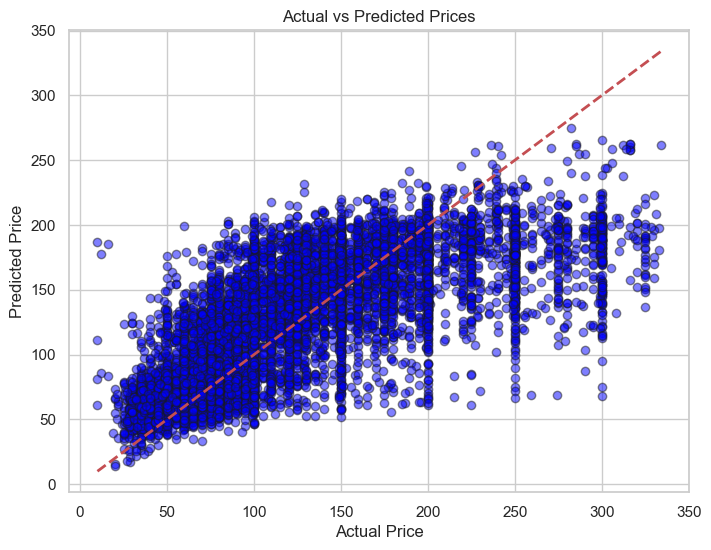

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # Reference line y=x
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()


In [42]:
import mlflow
import mlflow.sklearn
mlflow.set_experiment("testing")

# RandomForest was the best for me..............................................................................................................
with mlflow.start_run(run_name="Register_Best_Model", nested=True):
    # Log the RandomForest pipeline
    mlflow.sklearn.log_model(
        pipeline,  # the trained RandomForest pipeline
        artifact_path="best_model"
    )
    
    # Register in MLflow.........................................................
    result = mlflow.register_model(
        model_uri=f"runs:/{mlflow.active_run().info.run_id}/best_model",
        name="StayWisePriceModel"
    )

print("Model registered successfully!")
print(result)


2025/11/20 20:18:47 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/20 20:18:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'StayWisePriceModel' already exists. Creating a new version of this model...
2025/11/20 20:18:53 WARNING mlflow.tracking._model_registry.fluent: Run with id 09e527b5aef94bf196826dc9f30c0ca6 has no artifacts at artifact path 'best_model', registering model based on models:/m-e26cb730c0024b0a9ca389788c8d39ad instead


Model registered successfully!
<ModelVersion: aliases=[], creation_timestamp=1763687933357, current_stage='None', deployment_job_state=None, description=None, last_updated_timestamp=1763687933357, metrics=[], model_id='m-e26cb730c0024b0a9ca389788c8d39ad', name='StayWisePriceModel', params={}, run_id='09e527b5aef94bf196826dc9f30c0ca6', run_link=None, source='models:/m-e26cb730c0024b0a9ca389788c8d39ad', status='READY', status_message=None, tags={}, user_id=None, version=3>


Created version '3' of model 'StayWisePriceModel'.
